# Visualizing surfaces
In this notebook we create a surface mesh from a 3D dataset of a Gastruloid. The used example data is a derived from of [AV Luque and JV Veenvliet (2023)](https://zenodo.org/record/7603081#.Y94N4XbMJmN) licensed [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode). See the [creating_surfaces](creating_surfaces.ipynb) for how to create the surface from raw imaging data.

We visualize the surface using napari-process-points-and-surfaces, [vedo](https://vedo.embl.es/) and [napari](https://napari.org).

In [1]:
import napari_process_points_and_surfaces as nppas

import vedo

In [2]:
filename = "gastruloid.ply"

## Loading surfaces from disk
We first load the surface from disk using vedo.

In [3]:
mesh = vedo.load("gastruloid.ply")
surface = nppas.to_napari_surface_data(mesh)

The resulting object is visualized in Jupyter notebooks like this:

(array([[  4.5,  91. , 129. ],
        [  5. ,  90.5, 129. ],
        [  5. ,  91. , 128.5],
        ...,
        [150.5, 115. , 149. ],
        [150.5, 115. , 150. ],
        [150.5, 115. , 151. ]], dtype=float32),
 array([[     2,      1,      0],
        [     4,      3,      0],
        [     4,      0,      1],
        ...,
        [249176, 247824, 247826],
        [249176, 247826, 249177],
        [249177, 247826, 247765]], dtype=int64))
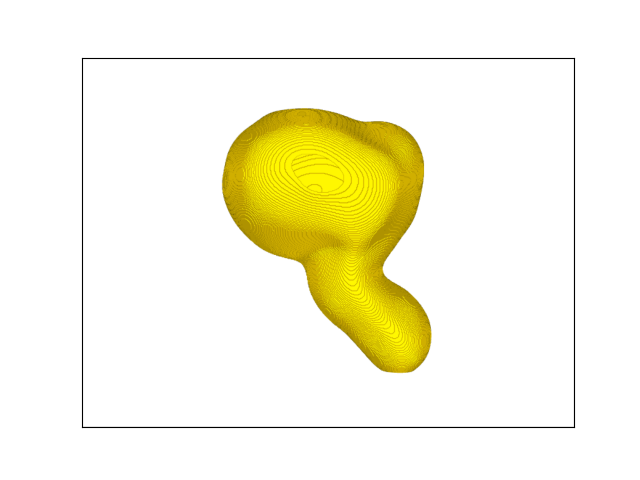

In [4]:
surface

(array([[  4.5,  91. , 129. ],
        [  5. ,  90.5, 129. ],
        [  5. ,  91. , 128.5],
        ...,
        [150.5, 115. , 149. ],
        [150.5, 115. , 150. ],
        [150.5, 115. , 151. ]]),
 array([[     2,      1,      0],
        [     4,      3,      0],
        [     4,      0,      1],
        ...,
        [249176, 247824, 247826],
        [249176, 247826, 249177],
        [249177, 247826, 247765]], dtype=int64),
 array([0.4080894 , 0.31462644, 0.25980762, ..., 0.4267767 , 0.4267767 ,
        0.38851126]))
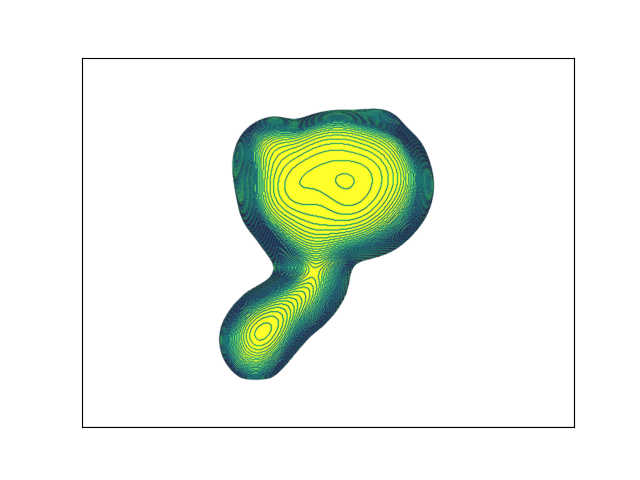
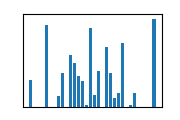

In [5]:
surface2 = nppas.add_quality(surface, nppas.Quality.AREA)
surface2.azimuth = -90
surface2

## Visualizing surfaces using napari-process-points-and-surfaces `nazimuths.show()`
You can tune the visualization using `nppas.show()`.

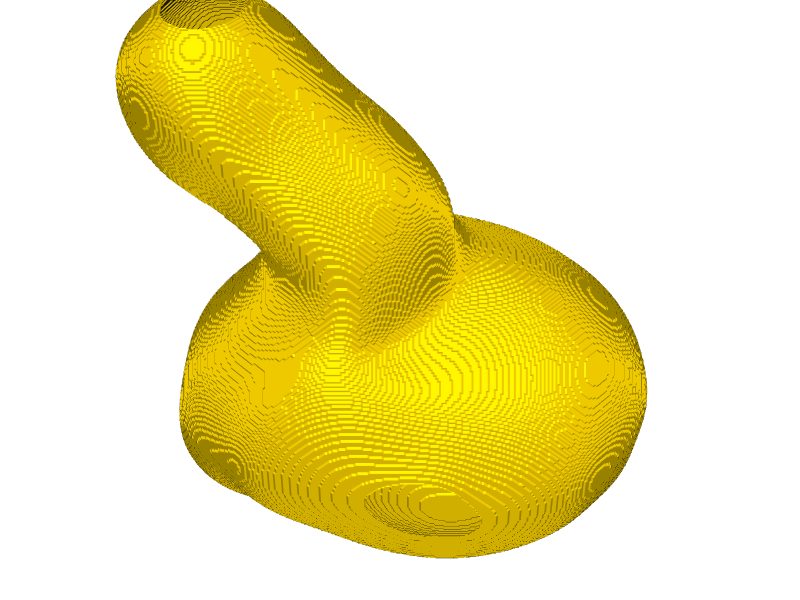

In [6]:
nppas.show(surface, zoom=1.5, azimuth=90, elevation=45)

## Visualizing surfaces using vedo
... using [vedo Plotter](https://vedo.embl.es/autodocs/content/vedo/vedo/plotter.html#Plotter).


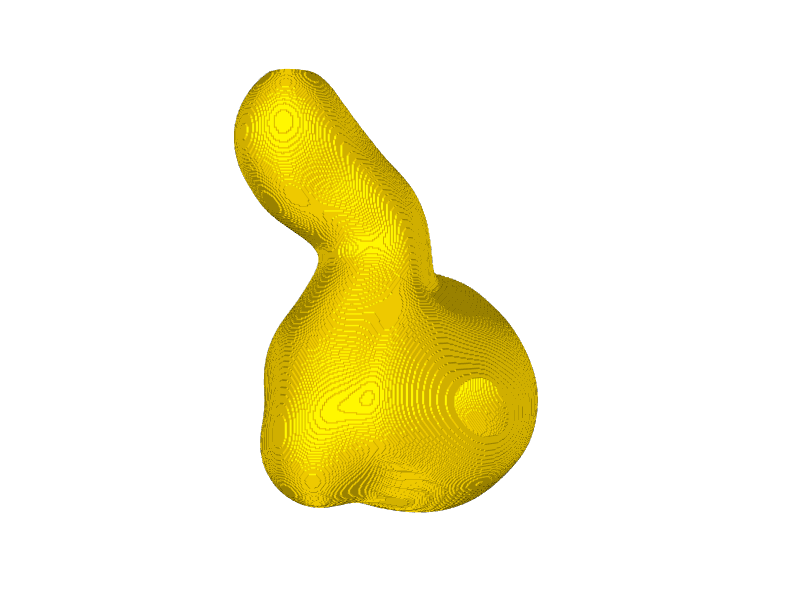

In [7]:
from vedo import Plotter

plt = Plotter()
mesh = nppas.to_vedo_mesh(surface)

plt.show(mesh, zoom=1, azimuth=45)

## Visualizing surfaces using napari


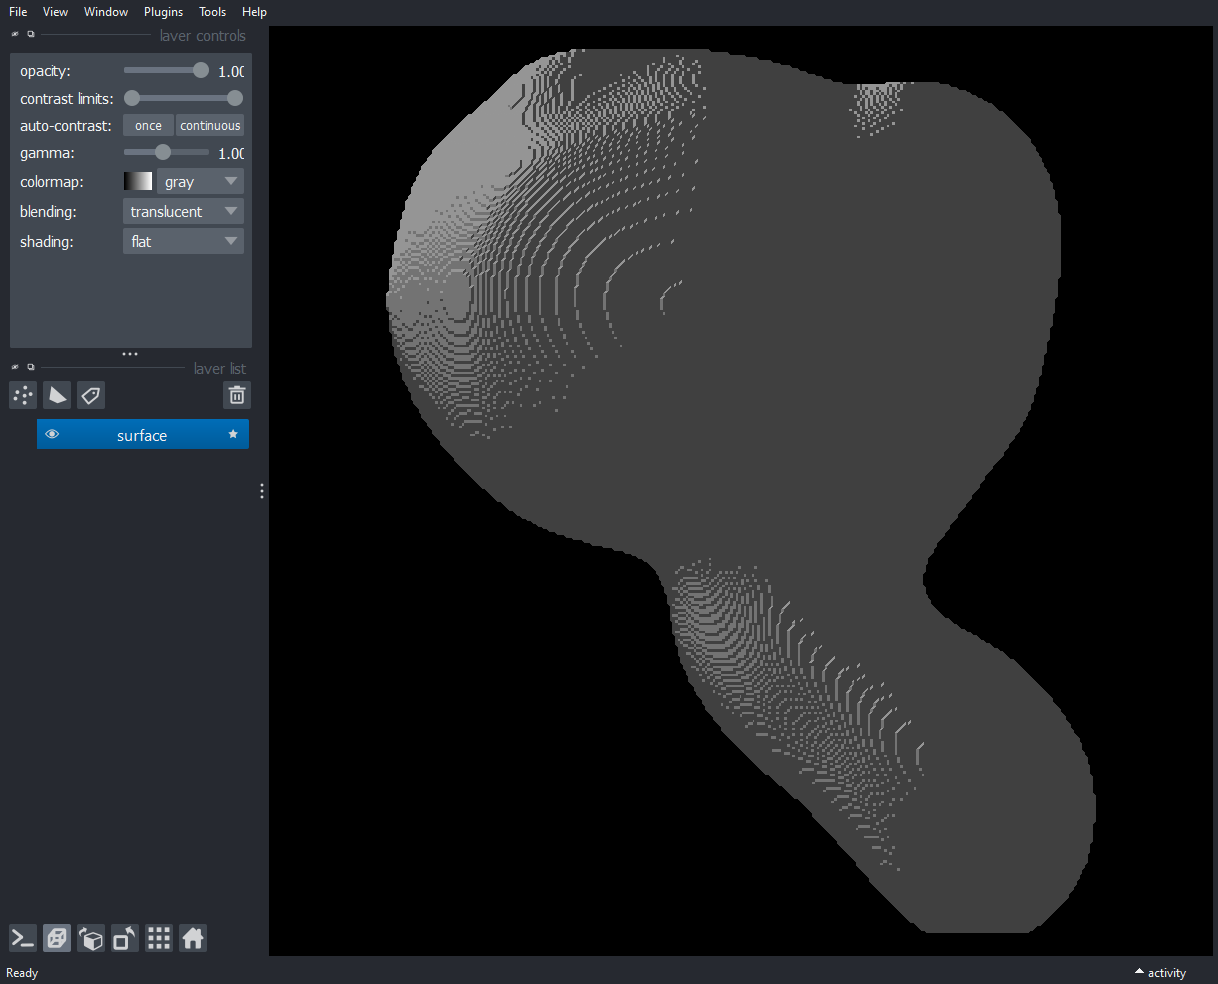

In [8]:
import napari
viewer = napari.Viewer(ndisplay=3)

viewer.add_surface(surface)

napari.utils.nbscreenshot(viewer)

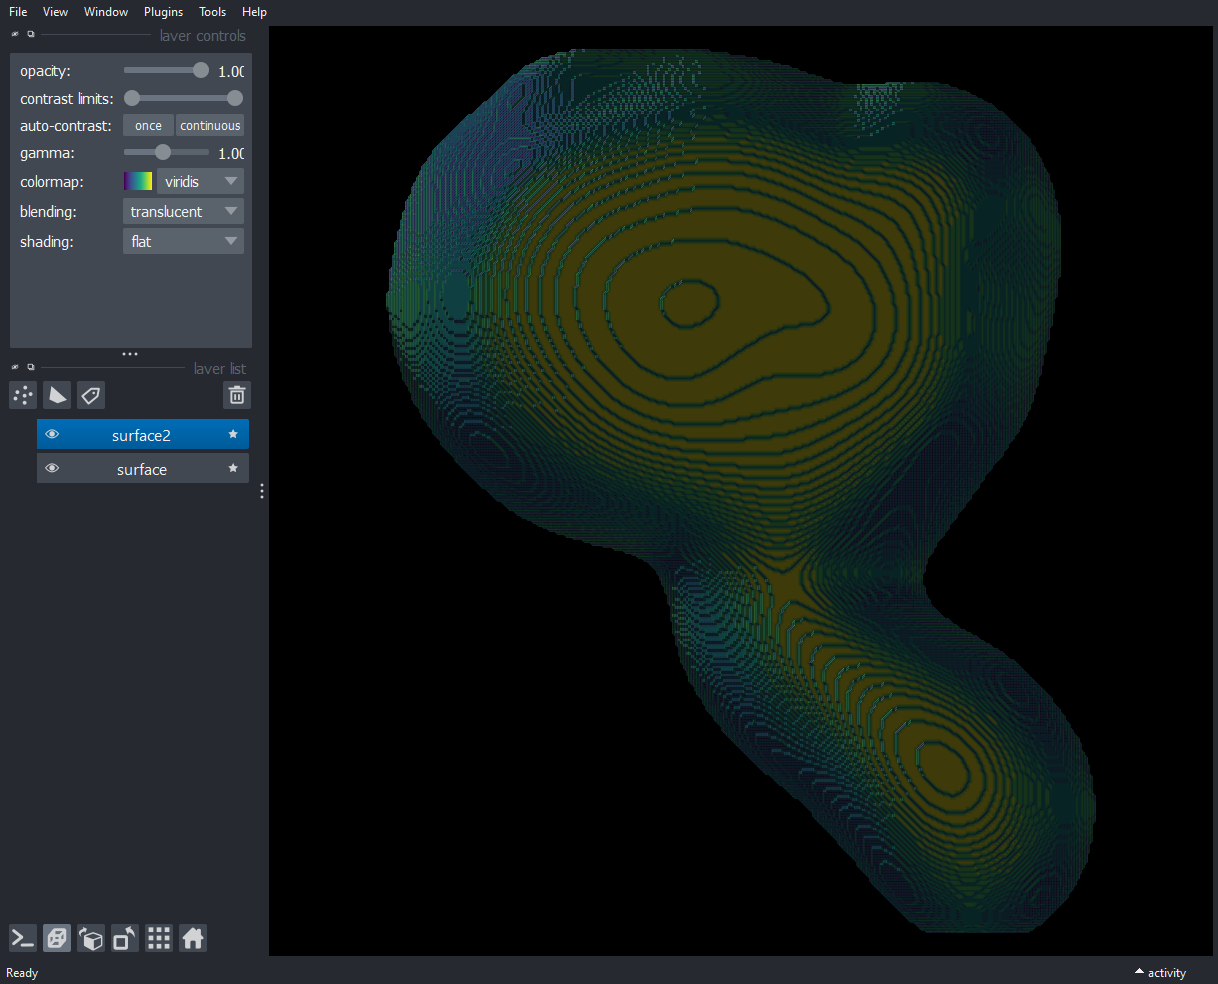

In [9]:

viewer.add_surface(surface2, colormap=surface2.cmap)

napari.utils.nbscreenshot(viewer)